# Has Fandango Fixed Its Movie Ratings?

Walt Hickey wrote a now famous data journalism article in 2015, which found strong evidence to suggest that Fandango's (online move ratings aggregator) rating system was biased and dishonest. in summary, the article revealed that Fandango's actual ratings were almost always inflated by rounding up for the *presented rating* (ratings displayed on the website/frontend). This effectively misled viewers to thinking movies were of higher quality than in reality. Fandango officials claimed this was all due to a bug in their system, and that the bug would be fixed as soon as possible.

The purpose of this project is to determine (with the help of more recent ratings data), whether any changes have actually been made.

## Data Sources

Luckily for us, one of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. Both data sets are available on github

Read in 'before' and "after' files

In [1]:
import pandas as pd
before = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

Some quick general exploration.

fandango_score_comparison.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. 
*In short, this is not randomly sampled*

movie_ratings_16_17.csv contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017.
*It isn't clear what "significant" means in this context.* 

This also implies that the 2017 movie rating data is also not randomly extracted. Thus, it may not fully and accurately display the nature of the distribution of ratings.

We can either continue with the data as is, or we can try to create our own dataset afresh.
We are resigned to continuing with these datasets so as to save time - continuing with the former would take too long to be justifiable.

In [2]:
before.info()
before.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

(146, 22)

In [3]:
after.info()
after.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


(214, 15)

Isolate columns with Fandango rating info

In [4]:
fandango_before = before[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [5]:
print(fandango_before.shape)
print(fandango_after.shape)

(146, 5)
(214, 3)


There a way to still get a respectable story from the data we have. The description of both data sources on Github implies that these movies are relatively popular(multiple site ratings, high vote counts and reviews).
We can compare before(2015) and after(2016) ratings of *'popular'* movies which appear on both sites. 

What is popular? How do we define *'popular'*? Common sense suggests *'that which is liked by many people'*, however we have no idea how many votes were made for movies in the latter file.

A very sound recommenation from Dataquest is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more

In [6]:
fandango_after.sample(10,random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


At of September 2021, all 10 movies above have more than 30 ratings on fandango. WIth that, we can proceed.

A quick double check to ensure the former file has no movies with ratings/votes less than thirty

In [7]:
sum(fandango_before['Fandango_votes'] < 30)

0

since we are doing a 2015 vs 2016 commparison, we need to filter for those two specific years.

In [8]:
fandango_2016 = fandango_after[fandango_after['year']==2016].copy()

In [9]:
fandango_2016.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [10]:
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]

In [11]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [12]:
fandango_2015 = fandango_before[fandango_before['Year'] == '2015'].copy()

In [13]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


## Comparing Density Plots for 2015 and 2016

Now we can finally start our analysis. A good way would be to create a kernel density plot comparing both datesets.

**NOTE**

*Fivethirtyeight style is uniquely available for the purpose of this course*

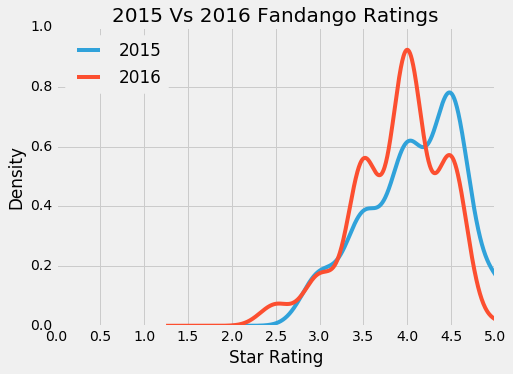

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True,figsize = (7,5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("2015 Vs 2016 Fandango Ratings", fontsize = 20)
plt.xlabel('Star Rating')
plt.xticks(np.arange(0,5.1,0.5))
plt.xlim(0,5)
plt.show()

So, we can see that we have two left-skewed graphs, and that movies were rated lower in 2016 than 2015 (because 2016 shifts to the left). The majority of the ratings are rather high in both years.
2016 seems a bit more symettrical in comparison.
Based on the above, it is safe to say that Fandango indeed rectified their ratings issue.

## Comparing Frequency Tables

Let's have a quick look at the two frequency distribution tables. The samples don't have the same number of movies, so we need to use relative frequencies.

In [15]:
round(fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100,2)

3.0     8.53
3.5    17.83
4.0    28.68
4.5    37.98
5.0     6.98
Name: Fandango_Stars, dtype: float64

In [16]:
round(fandango_2016['fandango'].value_counts(normalize = True).sort_index()*100,2)

2.5     3.14
3.0     7.33
3.5    24.08
4.0    40.31
4.5    24.61
5.0     0.52
Name: fandango, dtype: float64

An obervation here is that there is a much lower concentration of highly rated movies(4.5 and 5.0) in 2016 than there is in 2015.
The minimum rating in 2016 is 2.5. There isn't even a 2.5 rating in 2015.

## Direction of Summary Metrics

To get a more precise picture of the direction of distribubtion difference, let us use the basic metrics of mean, median and mode for each sample. So:

In [17]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]

mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

In [18]:
stats_2015 = [mean_2015, median_2015, mode_2015]
stats_2016 = [mean_2016, median_2016, mode_2016]

We need to create a new dataframe to display the differences.

In [22]:
summary = pd.DataFrame()
summary['2015'] = stats_2015
summary['2016'] = stats_2016
summary.index = ['mean','median','mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


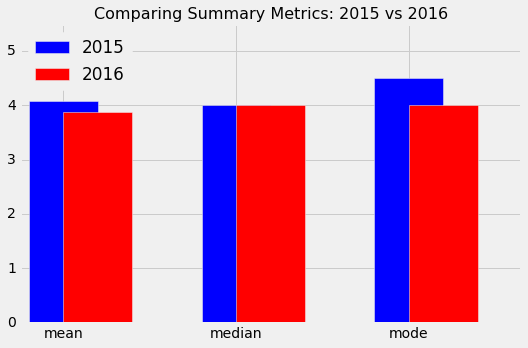

In [45]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(label = '2015',color = 'blue', align = 'center', width = 0.4)
summary['2016'].plot.bar(label = '2016', color = 'red', align = 'edge', width = 0.4, figsize = (8,5), rot = '0')
plt.legend(loc = "upper left")
plt.ylim(0,5.5)
plt.title('Comparing Summary Metrics: 2015 vs 2016', size = 16)

## Observations/Conclusions

For 2016: lower mean, same median, lower mode.

The analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

Even though there isn't documented evidence, i believe Walt Hickey's article was the catalyst that brought about this change.